# Single channel LDDMM with cascading smoothing kernel size

In [1]:
import sys
sys.path.insert(0,'../') # add code directory to path
# import lddmm
import torch_lddmm
# import numpy
import numpy as np
# import nibabel for i/o
import nibabel as nib
# import matplotlib for display
import matplotlib.pyplot as plt

## Load images as numpy arrays - Human Brain MRI

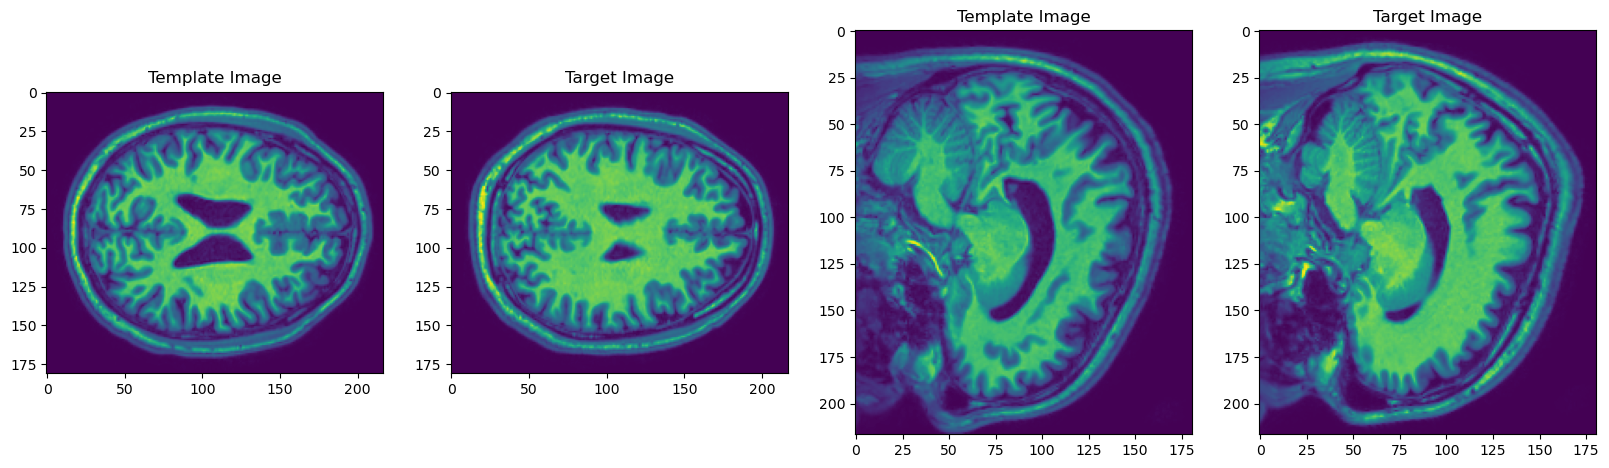

In [2]:
# set image file names
template_file_name = '../notebook/Adt27-55_02_Adt27-55_02_MNI.img'
target_file_name = '../notebook/Adt27-55_03_Adt27-55_03_MNI.img'

# load images
template_image_struct = nib.load(template_file_name)
target_image_struct = nib.load(target_file_name)

# set image spacing from template image, assume both images are the same spacing
dx = template_image_struct.header['pixdim'][1:4]

# get images as 3D numpy arrays
template_image = np.squeeze(template_image_struct.get_fdata()).astype(np.float32)
target_image = np.squeeze(target_image_struct.get_fdata()).astype(np.float32)

# draw a slice of each brain
plt.rcParams["figure.figsize"]=20,20
plt.figure()
plt.subplot(1,4,1)
plt.imshow(template_image[:,:,100])
plt.title('Template Image')
plt.subplot(1,4,2)
plt.imshow(target_image[:,:,100])
plt.title('Target Image')
plt.subplot(1,4,3)
plt.imshow(template_image[105,:,:])
plt.title('Template Image')
plt.subplot(1,4,4)
plt.imshow(target_image[105,:,:])
plt.title('Target Image')
plt.show()

## Make torch_lddmm object

In [3]:
# create torch_lddmm object again, this time with a = 10 to start with
lddmm = torch_lddmm.LDDMM(template=template_image,target=target_image,outdir='../notebook/',do_affine=0,do_lddmm=1,a=10,niter=200,epsilon=4e0,sigma=20.0,sigmaR=40.0,optimizer='gdr',dx=dx)


Current parameters:
>    a               = 10 (smoothing kernel, a*(pixel_size))
>    p               = 2 (smoothing kernel power, p*2)
>    niter           = 200 (number of iterations)
>    epsilon         = 4.0 (gradient descent step size)
>    epsilonL        = 1e-07 (gradient descent step size, affine)
>    epsilonT        = 2e-05 (gradient descent step size, translation)
>    minbeta         = 0.0001 (smallest multiple of epsilon)
>    sigma           = 20.0 (matching term coefficient (0.5/sigma**2))
>    sigmaR          = 40.0 (regularization term coefficient (0.5/sigmaR**2))
>    nt              = 5 (number of time steps in velocity field)
>    do_lddmm        = 1 (perform LDDMM step, 0 = no, 1 = yes)
>    do_affine       = 0 (interleave linear registration: 0 = no, 1 = affine, 2 = rigid, 3 = rigid + scale)
>    checkaffinestep = 0 (evaluate linear matching energy: 0 = no, 1 = yes)
>    im_norm_ms      = 0 (normalize image by mean and std: 0 = no, 1 = yes)
>    gpu_number      

## Change some parameters and run

In [4]:
# set 100 iterations instead
lddmm.setParams('niter',100)
# run computation
lddmm.run()

Parameter 'niter' changed to '100'.
iter: 0, E = 11173546.0000, ER = 0.0000, EM = 11173546.0000, epd = 4.000000.
iter: 1, E= 9685108.000, ER= 1666.478, EM= 9683442.000, epd= 4.000, time= 0.20s.
iter: 2, E= 9246739.000, ER= 3805.412, EM= 9242934.000, epd= 4.000, time= 0.20s.
iter: 3, E= 8980460.000, ER= 6025.544, EM= 8974434.000, epd= 4.000, time= 0.20s.
iter: 4, E= 8796883.000, ER= 8170.032, EM= 8788713.000, epd= 4.000, time= 0.20s.
iter: 5, E= 8659072.000, ER= 10260.072, EM= 8648812.000, epd= 4.000, time= 0.20s.
iter: 6, E= 8547106.000, ER= 12302.520, EM= 8534803.000, epd= 4.000, time= 0.20s.
iter: 7, E= 8453275.000, ER= 14312.967, EM= 8438962.000, epd= 4.000, time= 0.20s.
iter: 8, E= 8373496.500, ER= 16294.385, EM= 8357202.000, epd= 4.000, time= 0.20s.
iter: 9, E= 8304189.000, ER= 18248.752, EM= 8285940.000, epd= 4.000, time= 0.20s.
iter: 10, E= 8242503.000, ER= 20177.744, EM= 8222325.500, epd= 4.000, time= 0.20s.
iter: 11, E= 8187134.500, ER= 22085.607, EM= 8165049.000, epd= 4.000, 

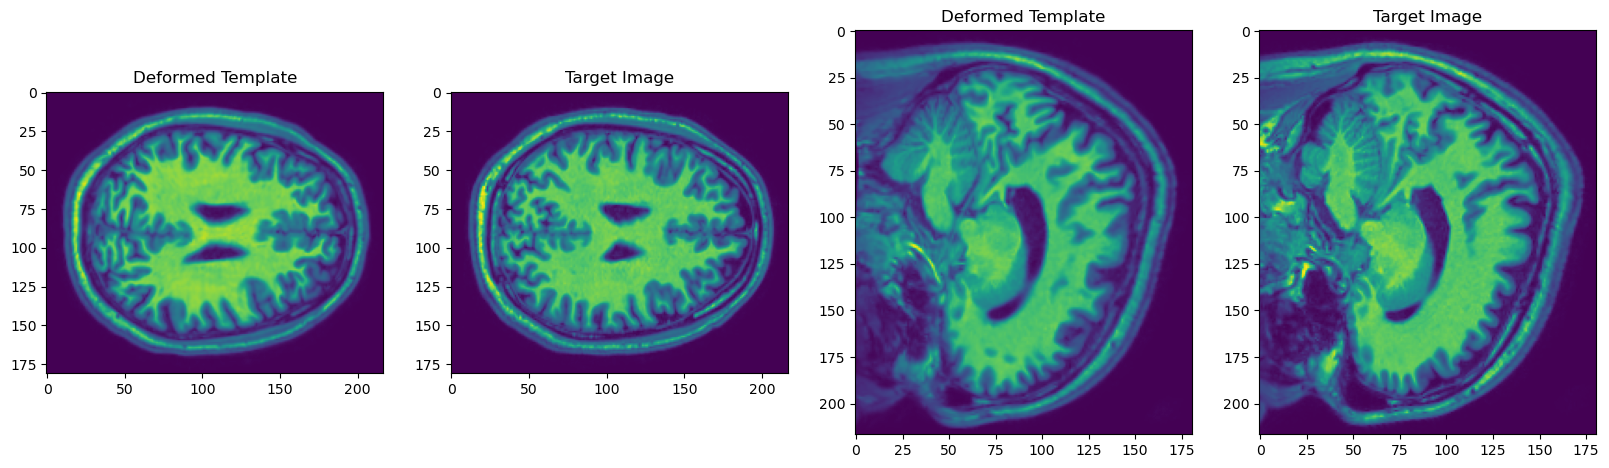

In [5]:
# display the deformed template according to the current transform
(deformed_template,_,_,_) = lddmm.applyThisTransform(template_image)
deformed_template = deformed_template[-1].cpu().numpy()
plt.figure()
plt.subplot(1,4,1)
plt.imshow(deformed_template[:,:,100])
plt.title('Deformed Template')
plt.subplot(1,4,2)
plt.imshow(target_image[:,:,100])
plt.title('Target Image')
plt.subplot(1,4,3)
plt.imshow(deformed_template[105,:,:])
plt.title('Deformed Template')
plt.subplot(1,4,4)
plt.imshow(target_image[105,:,:])
plt.title('Target Image')
plt.show()

## Change some parameters and continue optimization from current state

In [6]:
# now shrink the lddmm kernel size to 7
lddmm.setParams('a',7)
lddmm.setParams('niter',200)

# now when we do lddmm.run(), it will continue optimization from the end of the previous run (that is, transforms are not reset to identity between runs)
lddmm.run()

Parameter 'a' changed to '7'.
Parameter 'niter' changed to '200'.
iter: 0, E = 6976375.5000, ER = 59326.4609, EM = 6917049.0000, epd = 4.000000.
iter: 1, E= 6936657.000, ER= 61610.543, EM= 6875046.500, epd= 4.000, time= 0.20s.
iter: 2, E= 6899528.000, ER= 63842.930, EM= 6835685.000, epd= 4.000, time= 0.21s.
iter: 3, E= 6864689.000, ER= 66096.000, EM= 6798593.000, epd= 4.000, time= 0.24s.
iter: 4, E= 6831906.500, ER= 68318.195, EM= 6763588.500, epd= 4.000, time= 0.25s.
iter: 5, E= 6802089.500, ER= 70576.688, EM= 6731513.000, epd= 4.000, time= 0.25s.
iter: 6, E= 6776818.000, ER= 72778.953, EM= 6704039.000, epd= 4.000, time= 0.33s.
iter: 7, E= 6766742.500, ER= 75079.133, EM= 6691663.500, epd= 4.000, time= 0.32s.
iter: 8, E= 6797057.000, ER= 77255.688, EM= 6719801.500, epd= 4.000, time= 0.32s.
iter: 9, E= 6777182.000, ER= 78920.797, EM= 6698261.000, epd= 2.800, time= 0.32s.
iter: 10, E= 6750613.000, ER= 80361.000, EM= 6670252.000, epd= 2.800, time= 0.30s.
iter: 11, E= 6733973.000, ER= 8201

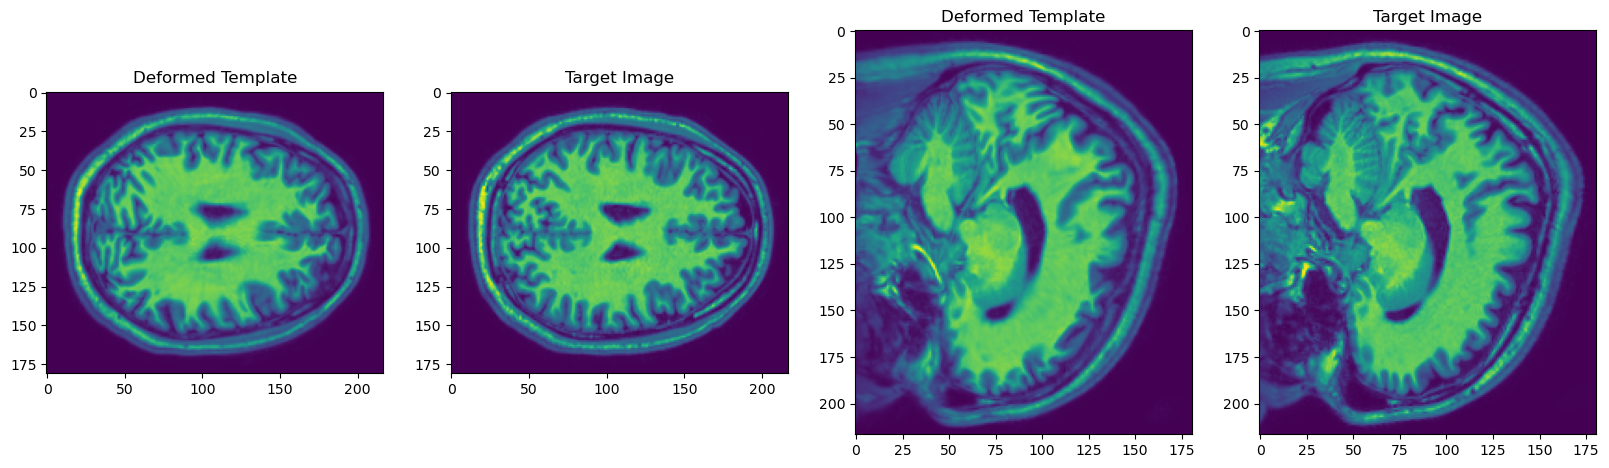

In [7]:
# display the deformed template according to the current transform
(deformed_template,_,_,_) = lddmm.applyThisTransform(template_image)
deformed_template = deformed_template[-1].cpu().numpy()
plt.figure()
plt.subplot(1,4,1)
plt.imshow(deformed_template[:,:,100])
plt.title('Deformed Template')
plt.subplot(1,4,2)
plt.imshow(target_image[:,:,100])
plt.title('Target Image')
plt.subplot(1,4,3)
plt.imshow(deformed_template[105,:,:])
plt.title('Deformed Template')
plt.subplot(1,4,4)
plt.imshow(target_image[105,:,:])
plt.title('Target Image')
plt.show()

## Change parameters again and continue running

In [8]:
# now shrink the lddmm kernel size again and continue optimization
lddmm.setParams('a',5)
lddmm.run()

Parameter 'a' changed to '5'.
iter: 0, E = 5645441.5000, ER = 135208.2656, EM = 5510233.0000, epd = 4.000000.
iter: 1, E= 5611382.500, ER= 138348.469, EM= 5473034.000, epd= 4.000, time= 0.24s.
iter: 2, E= 5579474.500, ER= 141413.312, EM= 5438061.000, epd= 4.000, time= 0.31s.
iter: 3, E= 5550907.000, ER= 144491.891, EM= 5406415.000, epd= 4.000, time= 0.32s.
iter: 4, E= 5534758.000, ER= 147466.562, EM= 5387291.500, epd= 4.000, time= 0.33s.
iter: 5, E= 5650899.500, ER= 150742.781, EM= 5500156.500, epd= 4.000, time= 0.34s.
iter: 6, E= 5875080.500, ER= 152665.594, EM= 5722415.000, epd= 2.800, time= 0.33s.
iter: 7, E= 5664455.000, ER= 154229.094, EM= 5510226.000, epd= 1.960, time= 0.33s.
iter: 8, E= 5636856.000, ER= 155563.062, EM= 5481293.000, epd= 1.960, time= 0.33s.
iter: 9, E= 5633510.000, ER= 157130.094, EM= 5476380.000, epd= 1.960, time= 0.33s.
iter: 10, E= 5608606.500, ER= 158481.719, EM= 5450125.000, epd= 1.960, time= 0.33s.
iter: 11, E= 5606709.000, ER= 160038.203, EM= 5446671.000, 

In [9]:
# now shrink the lddmm kernel size again and continue optimization
lddmm.setParams('a',2.5)
lddmm.run()

lddmm.setParams('a',1.0)
lddmm.run()

Parameter 'a' changed to '2.5'.
iter: 0, E = 4514674.0000, ER = 179636.8125, EM = 4335037.0000, epd = 4.000000.
iter: 1, E= 4319707.500, ER= 184875.766, EM= 4134831.750, epd= 4.000, time= 0.20s.
iter: 2, E= 4187735.500, ER= 189858.375, EM= 3997877.000, epd= 4.000, time= 0.24s.
iter: 3, E= 4643539.500, ER= 195491.672, EM= 4448048.000, epd= 4.000, time= 0.30s.
iter: 4, E= 6045261.000, ER= 198859.047, EM= 5846402.000, epd= 2.800, time= 0.39s.
iter: 5, E= 5214522.000, ER= 201414.844, EM= 5013107.000, epd= 1.960, time= 0.39s.
iter: 6, E= 5124094.000, ER= 203063.781, EM= 4921030.000, epd= 1.960, time= 0.38s.
iter: 7, E= 5407263.000, ER= 206312.219, EM= 5200951.000, epd= 1.960, time= 0.38s.
iter: 8, E= 4150882.500, ER= 207013.406, EM= 3943869.000, epd= 1.372, time= 0.38s.
iter: 9, E= 4025503.000, ER= 208775.375, EM= 3816727.500, epd= 1.372, time= 0.35s.
iter: 10, E= 3991993.000, ER= 210285.969, EM= 3781707.000, epd= 1.372, time= 0.35s.
iter: 11, E= 4013619.750, ER= 212123.812, EM= 3801496.000

## Display resulting deformed template

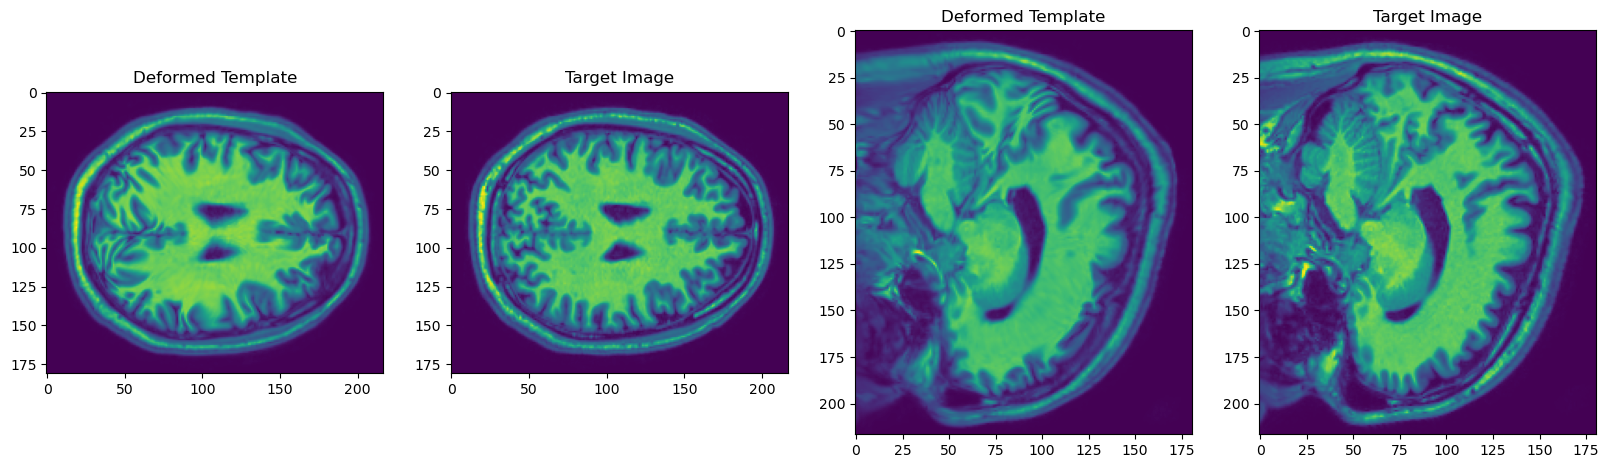

In [10]:
# display the deformed template according to the current transform
(deformed_template,_,_,_) = lddmm.applyThisTransform(template_image)
deformed_template = deformed_template[-1].cpu().numpy()
plt.figure()
plt.subplot(1,4,1)
plt.imshow(deformed_template[:,:,100])
plt.title('Deformed Template')
plt.subplot(1,4,2)
plt.imshow(target_image[:,:,100])
plt.title('Target Image')
plt.subplot(1,4,3)
plt.imshow(deformed_template[105,:,:])
plt.title('Deformed Template')
plt.subplot(1,4,4)
plt.imshow(target_image[105,:,:])
plt.title('Target Image')
plt.show()

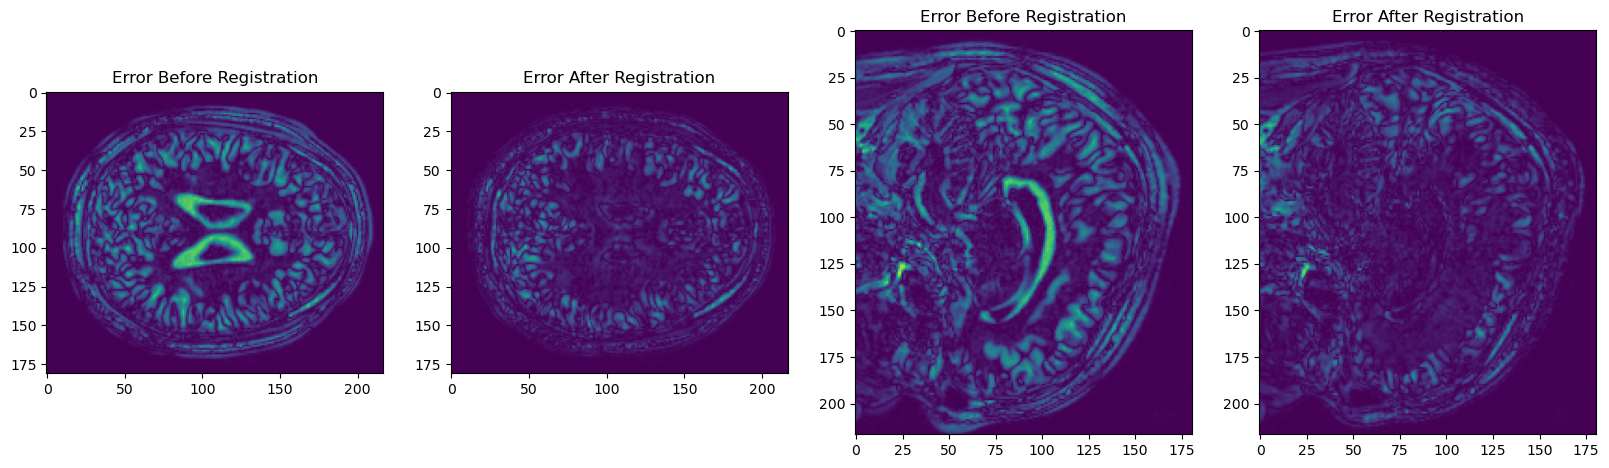

In [11]:
# display intensity difference before and after mapping
diffimg_before = np.abs(template_image-target_image)
diffimg_after = np.abs(deformed_template-target_image)
plt.figure()
plt.subplot(1,4,1)
plt.imshow(diffimg_before[:,:,100],vmin=0,vmax=255)
plt.title('Error Before Registration')
plt.subplot(1,4,2)
plt.imshow(diffimg_after[:,:,100],vmin=0,vmax=255)
plt.title('Error After Registration')
plt.subplot(1,4,3)
plt.imshow(diffimg_before[105,:,:],vmin=0,vmax=255)
plt.title('Error Before Registration')
plt.subplot(1,4,4)
plt.imshow(diffimg_after[105,:,:],vmin=0,vmax=255)
plt.title('Error After Registration')
plt.show()

In [12]:
# output transforms
(vt0,vt1,vt2) = lddmm.outputTransforms() # output LDDMM and linear transforms
(phi0,phi1,phi2) = lddmm.computeThisDisplacement() # output resultant displacement field
deformed_template = lddmm.outputDeformedTemplate() # output deformed template as numpy array


In [19]:
np.min(phi0),np.max(phi0)

(-10.444215, 11.991314)

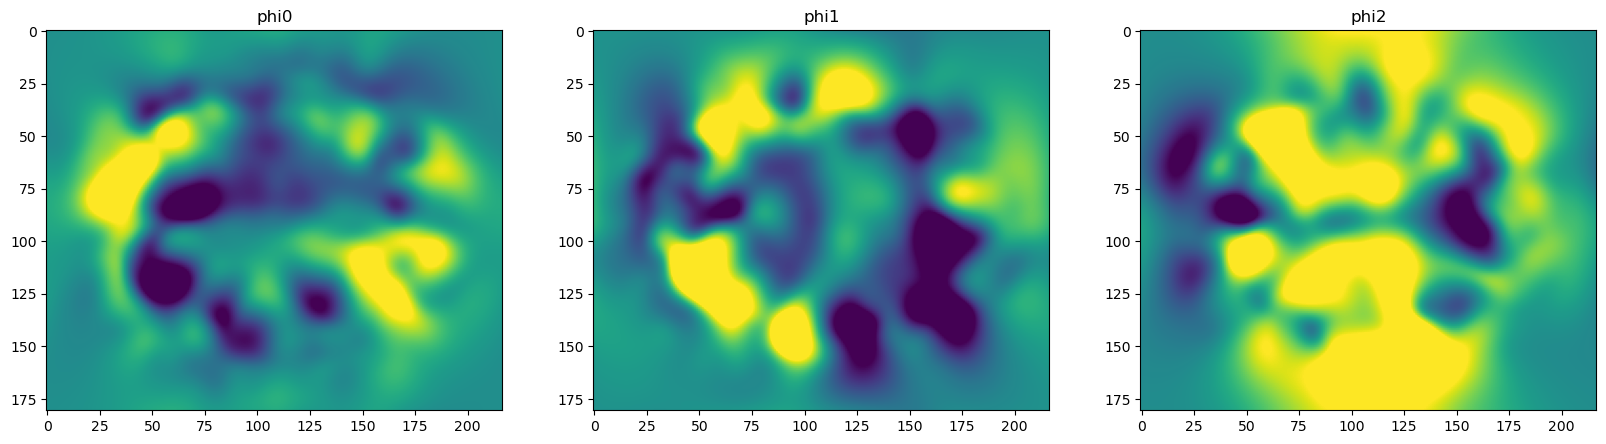

In [22]:
plt.figure()
plt.subplot(1,3,1)
plt.imshow(phi0[:,:,100],vmin=-4,vmax=4)
plt.title('phi0')
plt.subplot(1,3,2)
plt.imshow(phi1[:,:,100],vmin=-4,vmax=4)
plt.title('phi1')
plt.subplot(1,3,3)
plt.imshow(phi2[:,:,100],vmin=-4,vmax=4)
plt.title('phi2')
plt.show()

In [15]:
phi0.shape

(181, 217, 181)

In [ ]:

# clear memory (the LDDMM object still exists and consumes some GPU memory but transforms are deleted)
lddmm.delete()